<a href="https://colab.research.google.com/github/vishnu-chand/Guide_to_Signals_and_Patterns_in_Image_Processing/blob/master/Guide_to_Signals_and_Patterns_in_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/vishnu-chand/Guide_to_Signals_and_Patterns_in_Image_Processing.git

Cloning into 'Guide_to_Signals_and_Patterns_in_Image_Processing'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


# [Guide to Signals and Patterns in Image Processing ](https://www.springer.com/gp/book/9783319141718)

[Apurba Das](https://www.linkedin.com/in/apurbadas1980/)

---
### Implemented by

*   [Nithish Chauhan](https://www.linkedin.com/in/nithish-chauhan-69353582/)
*   [Vishnu Chand](https://www.linkedin.com/in/vishnu-chand-00bba3123/)

In [2]:
import cv2
import math
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from itertools import combinations
from skimage.color import rgb2gray
from collections import OrderedDict
from ipywidgets import interactive, interact_manual

dbpath = r'db'

def show_in_mat(vec,width,height,ksize = 1):
    vec = np.array(vec)
    temp = vec.reshape(height,width,ksize,ksize)
    v = []
    for i in temp:
        v.append(cv2.hconcat(i))
    v = cv2.vconcat(v)
    return v


def imshow(*imgs, **kw):
    bgr2rgb = False
    nimg = len(imgs)
    if kw.get('col') is None:
        col = nimg ** .5
        col = int(col + 1 if col % 1 else col)
    else:
        col = kw.pop('col')
    row = nimg / col
    row = row + 1 if (col * row) - nimg else row
    row, col = int(row), int(col)
    if row == col == 1:
        plts = [plt.subplots(row,col,figsize=kw.pop('figsize',(20,20)))[1]]
    else:
        plts = plt.subplots(row,col,figsize=kw.pop('figsize',(20,20)))[1].ravel()
    for img, ax in zip(imgs, plts):
        if len(img)==2:
            name, img = img
            if kw.get('cmap') == 'bgr' or bgr2rgb:
                kw.pop('cmap',None)
                bgr2rgb = True
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # bgr to rgb
            ax.imshow(img,**kw)
            ax.set_title(name)
        else:
            if kw.get('cmap') == 'bgr' or bgr2rgb:
                kw.pop('cmap',None)
                bgr2rgb = True
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # bgr to rgb
            ax.imshow(img,**kw)
    plt.show()
%cd Guide_to_Signals_and_Patterns_in_Image_Processing/

/content/Guide_to_Signals_and_Patterns_in_Image_Processing


In [3]:
def func(sample_freq, order):
    x, y = np.mgrid[-1:1:sample_freq*1j, -1:1:sample_freq*1j]
    z = 1 * np.exp(-2*(x**order+y**order))
    imshow(z,cmap=None,figsize=(7,7),interpolation='none')
interactive(func,sample_freq=(1, 120, 1), order=(2, 20, 2))

interactive(children=(IntSlider(value=60, description='sample_freq', max=120, min=1), IntSlider(value=10, desc…

In [4]:
img = cv2.imread(join(dbpath,r'lena.jpg'))
def func(down_sample):
    imshow(('Original',img), 
           ('Sampling',img[::down_sample,::down_sample]),
           interpolation='none',cmap='bgr')
interactive(func,down_sample=(1, 51, 5))

interactive(children=(IntSlider(value=26, description='down_sample', max=51, min=1, step=5), Output()), _dom_c…

In [ ]:
img1 = cv2.imread(join(dbpath,'sampling.jpg'),0)

def quantize_img(quantize_level):
    img2 = img1.copy()
    step = np.linspace(0, 256, quantize_level + 1).astype('u2')
    
    nstep = step[1:]
    for ps, ns in zip(step, nstep):
        img2[(ps <= img1) & (img1 <= ns)] = ps
    img2 = img2.astype('u1')
    imshow(('Original', img1),
           ('Amplitude Quantized', img2), cmap='gray',
            interpolation='none', figsize=(20, 20))
#     print(step) 
    
interactive(quantize_img,quantize_level=(2, 255, 1))

interactive(children=(IntSlider(value=128, description='quantize_level', max=255, min=2), Output()), _dom_clas…

In [ ]:
img1 = cv2.imread(join(dbpath,r'gumby.bmp'),0)

def translation_edge_detection(scale):
    img2 = img1.copy()
    img3 = img1.copy()
    img4 = np.zeros_like(img1).copy()

    img2[:-scale] = img1[scale:]
    img2 = img1 - img2
    img3[scale:] = img1[:-scale]
    img3 = img1 - img3
    img4[img2 == 255] = 255
    img4[img3 == 255] = 255
    imshow(('Input Image',img1), 
           ('Slide Left Top', img2),
           ('Slide Right Bottom', img3),
           ('Output Image', img4),
           cmap='binary',
            interpolation='none')
interactive(translation_edge_detection,scale=(1, 25, 5))

interactive(children=(IntSlider(value=11, description='scale', max=25, min=1, step=5), Output()), _dom_classes…

In [ ]:
x = np.array([1, 1, 1, 1, 0, 0, 0, 0])
edge = x[:-1] - x[1:]
edge[edge <= 0] = 0  # quantization
edge[edge > 0] = 1  # quantization
print(edge)
x = np.array([1, 1, 1, 1, 0, 0, 0, 0])
edge = x[1:] - x[:-1]
edge[edge <= 0] = 0 # quantization
edge[edge > 0] = 1 # quantization
print(edge)

[0 0 0 1 0 0 0]
[0 0 0 0 0 0 0]


In [ ]:

def hough_line(impath, rho,theta,threshold,edgeth1=50, edgeth2=150):
    oimg = cv2.imread(join(dbpath, impath))
    oimg = cv2.resize(oimg, (256, 256), interpolation=cv2.INTER_CUBIC)
    img = oimg.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edge_img = cv2.Canny(gray,edgeth1,edgeth2,apertureSize = 3)
    if theta:
        lines = cv2.HoughLines(edge_img,rho,np.pi/theta,threshold)
        if lines is not None:
            for line in lines:
                for rho,theta in line:
                    a = np.cos(theta)
                    b = np.sin(theta)
                    x0 = a*rho
                    y0 = b*rho
                    x1 = int(x0 + 1000*(-b))
                    y1 = int(y0 + 1000*(a))
                    x2 = int(x0 - 1000*(-b))
                    y2 = int(y0 - 1000*(a))
                    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    imshow(('edge_img', edge_img), ('Image', img), cmap='gray')  

interactive(hough_line,
# interact_manual(hough_line,
            impath=['sudoku.jpg', 'lane.jpg'],
            rho=(1,3,1),
            theta=(0,180,20),
            threshold=(1,400,40),
            edgeth1=(0,100,10), edgeth2=(0,300,10))

interactive(children=(Dropdown(description='impath', options=('sudoku.jpg', 'lane.jpg'), value='sudoku.jpg'), …

In [ ]:
def generate_gabor(k_size, sigma):
    lm = np.linspace(1,5,5)
    th = np.linspace(0,7*np.pi/8.0,8)
    vec = []
    for i,l in enumerate(lm):
        for j,t in enumerate(th):
            k = cv2.getGaborKernel((k_size,k_size),sigma,t*180/np.pi,l,1,0)
            k = cv2.normalize(k,k, 1, 0, norm_type=1)
            vec.append(k)
    t = show_in_mat(vec,10,-1,k_size)
    imshow(("Gabor filters",t),cmap='gray')
interactive(generate_gabor,k_size=(11,100,10),sigma=(0,10,1))

interactive(children=(IntSlider(value=51, description='k_size', min=11, step=10), IntSlider(value=5, descripti…

In [ ]:
# resize the image
path = join(dbpath,r'affine/one_way_train_0001.jpg')
def resize(wscale,hscale):
    img = cv2.imread(path)
    height, width = img.shape[:2]
    res = cv2.resize(img,(int(wscale*width), int(hscale*height)), interpolation = cv2.INTER_CUBIC)
    imshow(('input',img), ('resized',res), cmap='gray')
    return img
interactive(resize,wscale=(1,5,1),hscale=(1,5,1))

interactive(children=(IntSlider(value=3, description='wscale', max=5, min=1), IntSlider(value=3, description='…

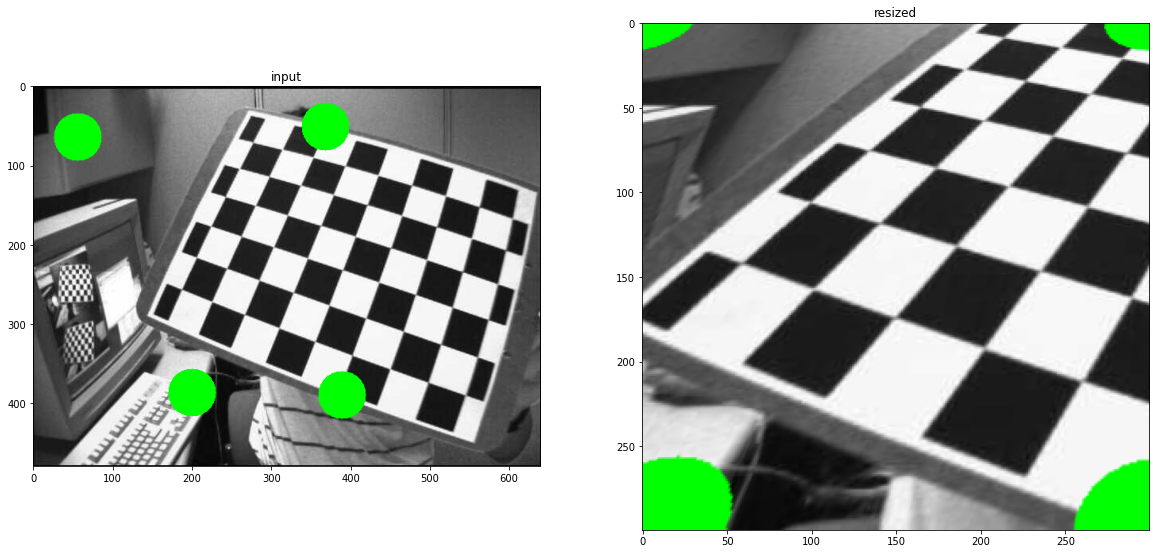

In [ ]:
#perspective transformation
img = cv2.imread(path)
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[200,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
for x,y in pts1:
    cv2.circle(img,(int(x),int(y)),30,(0,255,0),-1)

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))

imshow(('input',img), ('resized',dst))

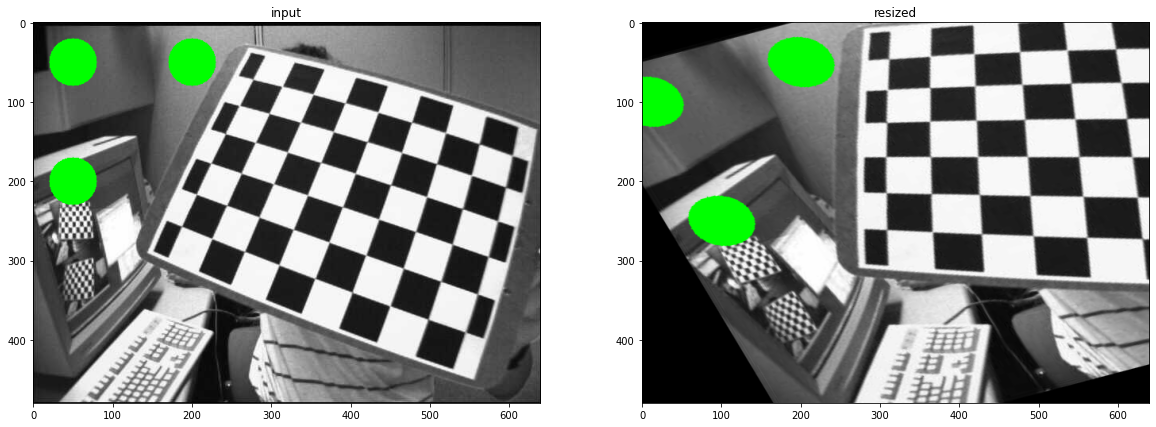

In [ ]:
# affine transformation

img = cv2.imread(path)
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

for x,y in pts1:
    cv2.circle(img,(int(x),int(y)),30,(0,255,0),-1)

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

imshow(('input',img), ('resized',dst))

In [ ]:
# rotation
def rotate(angle):
    img = cv2.imread(path,0)
    rows,cols = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    imshow(('input',img),('output',dst),cmap='gray')
interactive(rotate,angle=(0,180,1))

interactive(children=(IntSlider(value=90, description='angle', max=180), Output()), _dom_classes=('widget-inte…

In [ ]:
# translation
def translation(m1,m2):
    img = cv2.imread(path,0)
    rows,cols = img.shape
    M = np.float32([[1,0,m1],[0,1,m2]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    imshow(('input',img),('output',dst),cmap='gray')
interactive(translation,m1=(-300,300,1),m2=(-300,300,1))

interactive(children=(IntSlider(value=0, description='m1', max=300, min=-300), IntSlider(value=0, description=…

In [ ]:
def rearrange_quadrants(src):
    '''
        Rearrange the quadrants of Fourier image so that the origin is at the image center.
        Swaps quadrant 1 with 3, and 2 with 4.
    '''
    ret = np.empty_like(src)
    h, w = src.shape[:2]
    cx1 = cx2 = int(w / 2)
    cy1 = cy2 = int(h / 2)

    # if the size is odd, then adjust the bottom/right quadrants
    if w % 2 != 0:
        cx2 += 1
    if h % 2 != 0:
        cy2 += 1

    # swap q1 and q3
    ret[h - cy1:, w - cx1:] = src[0:cy1, 0:cx1]  # q1 -> q3
    ret[0:cy2, 0:cx2] = src[h - cy2:, w - cx2:]  # q3 -> q1

    # swap q2 and q4
    ret[0:cy2, w - cx2:] = src[h - cy2:, 0:cx2]  # q2 -> q4
    ret[h - cy1:, 0:cx1] = src[0:cy1, w - cx1:]  # q4 -> q2
    return ret


def fft(im, figsize=(10,10)):
    h, w = im.shape[:2]
    realInput = im.astype(np.float64)
    dft_M = cv2.getOptimalDFTSize(w)
    dft_N = cv2.getOptimalDFTSize(h)

    # copy A to dft_A and pad dft_A with zeros
    dft_A = np.zeros((dft_N, dft_M, 2), dtype=np.float64)
    dft_A[:h, :w, 0] = realInput
    cv2.dft(dft_A, dst=dft_A, nonzeroRows=h)

    image_Re, image_Im = cv2.split(dft_A)
    magnitude = cv2.sqrt(image_Re ** 2.0 + image_Im ** 2.0)
    phase = np.arctan2(image_Im, image_Re)
    log_spectrum = cv2.log(1.0 + magnitude)

    # Rearrange the quadrants of Fourier image so that the origin is at
    # the image center
    cv2.normalize(log_spectrum, log_spectrum, 0.0, 1.0, cv2.NORM_MINMAX)
    disp_spectrum  = log_spectrum.copy()
    log_spectrum = rearrange_quadrants(log_spectrum)
    imshow(("filter window",im), ("phase", phase), figsize=figsize, cmap='gray')
    imshow(("magnitude", disp_spectrum), ("rearrange_quadrants", log_spectrum), figsize=figsize, cmap='gray')
    return image_Re, image_Im

In [ ]:
from ipywidgets.widgets import IntText, Dropdown, Text

textBoxes = OrderedDict()
for k, v in zip(['filter_width', 'filter_height', 'thickness'], [30, 30, -1]):
    textBoxes[k] = Text(description=k, continuous_update=False, value=str(v))

def test_fft(filter_width, filter_height, thickness):
    img_size = 256
    img = np.zeros((img_size, img_size), 'u1')
    w, h = int(filter_width), int(filter_height)
    xc, yc = int(img.shape[0]/2), int(img.shape[1]/2)
    x0, y0, x1, y1 = xc - w, yc - h, xc + w, yc + h 
    img = cv2.rectangle(img, (x0, y0), (x1, y1), 1, int(thickness))
    k = fft(img)



print("Press enter after updaing x0, y0, x1, y1")
# interactive(test_fft, filter_width=textBoxes['filter_width'], filter_height=textBoxes['filter_height'], thickness=textBoxes['thickness'])
interactive(test_fft, filter_width=(0, 90, 10), filter_height=(0, 90, 10), thickness=textBoxes['thickness'])

Press enter after updaing x0, y0, x1, y1


interactive(children=(IntSlider(value=40, description='filter_width', max=90, step=10), IntSlider(value=40, de…

In [ ]:
img = cv2.imread(join(dbpath,'lena.jpg'),0)

def create_mask(radius, filter):
    rows, cols = img.shape
    hpf_mask = np.ones_like(img)*255
    cx, cy, radius = int(rows / 2), int(cols / 2), radius
    cv2.circle(hpf_mask,(cx,cy), int(radius), color=(0,0,0), thickness=-1)
    lpf_mask = cv2.bitwise_not(hpf_mask)
    imshow(('hpf_mask', hpf_mask),('lpf_mask', lpf_mask),
           cmap='gray',figsize=(5,5))
    if filter == 'hpf':
        return hpf_mask
    return lpf_mask

def fft(img, inverse=False):
    if not inverse:
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        return fshift
    else:
        f_ishift = np.fft.ifftshift(img)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        return img_back


def filter(mask_radius, filter_type):
    fft_img = fft(img)
    magnitude_spectrum = 20 * np.log(np.abs(fft_img))
    hpf_fft_img = fft_img.copy()
    rows, cols = img.shape
    mask = create_mask(mask_radius, filter_type)
    hpf_fft_img[mask==0] = 0
    hpf_magnitude_spectrum = 20 * (np.abs(hpf_fft_img))
    hpf_img = fft(hpf_fft_img, inverse=True)

    imshow(
            ('Input Image',img),
            ('Magnitude Spectrum',magnitude_spectrum),
            ('HPF Magnitude Spectrum',hpf_magnitude_spectrum),
            ('Image after HPF',hpf_img), cmap='gray',figsize=(5,5)
    )
    imshow(('Image after HPF',hpf_img), cmap='jet',figsize=(5,5))
interactive(filter, mask_radius=(1, 55, 1), filter_type=['hpf', 'lpf'])

In [ ]:
operations = OrderedDict(
        dilate    = cv2.MORPH_DILATE,
        erode     = cv2.MORPH_ERODE,
        open      = cv2.MORPH_OPEN,
        close     = cv2.MORPH_CLOSE,
        gradient  = cv2.MORPH_GRADIENT,
        tophat    = cv2.MORPH_TOPHAT,
        blackhat  = cv2.MORPH_BLACKHAT,

    )

kernal_structures = OrderedDict(
        cross   = cv2.MORPH_CROSS,
        rect    = cv2.MORPH_RECT,
        ellipse = cv2.MORPH_ELLIPSE,
)


def morph(imgType, operation, noise, kernelHeight, kernelWidth, kernal_structure, iterations):  
    path = join(dbpath,r"morphological/%s.png" % imgType)
    img = cv2.imread(path,0)
    img = cv2.inRange(img, 50, 255)
    rand = np.zeros_like(img)
    x = np.random.randint(0, img.shape[0], noise)
    y = np.random.randint(0, img.shape[1], noise)
    rand[x, y] = 255
    img = cv2.bitwise_xor(img, rand)
    out = cv2.morphologyEx(img, operations[operation], cv2.getStructuringElement(kernal_structures[kernal_structure], (kernelWidth, kernelHeight)), iterations=iterations)
    imshow(('input',img), (operation, out), cmap='gray')

interactive(morph,
            imgType           = ['whiteForeGround', 'blackForeground'],
            operation         = operations.keys(), 
            noise             = (0,200,10),
            kernelHeight      = (3,10,1),
            kernelWidth       = (3,10,1),
            kernal_structure  = kernal_structures.keys(),
            iterations        = [1, 3, 5, 7]
            )

interactive(children=(Dropdown(description='imgType', options=('whiteForeGround', 'blackForeground'), value='w…

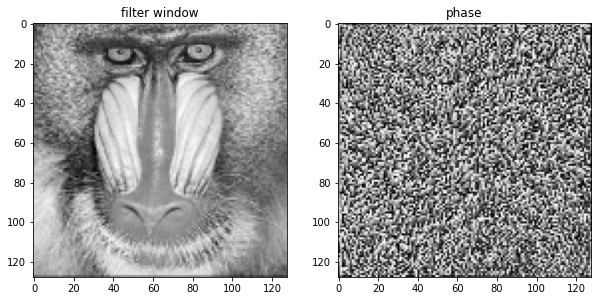

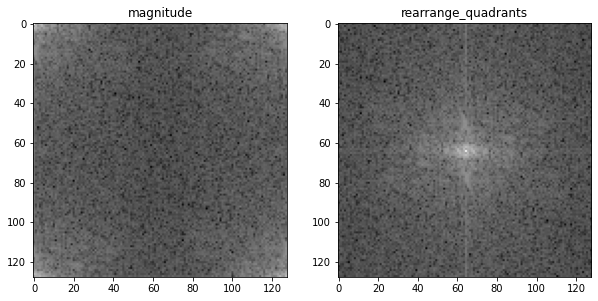

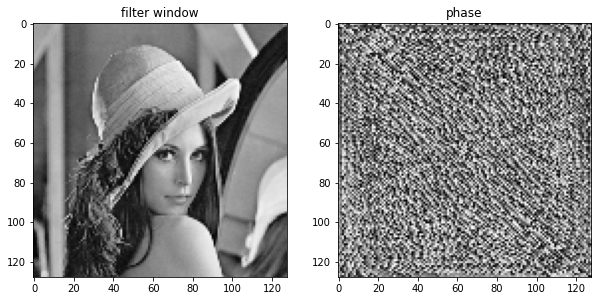

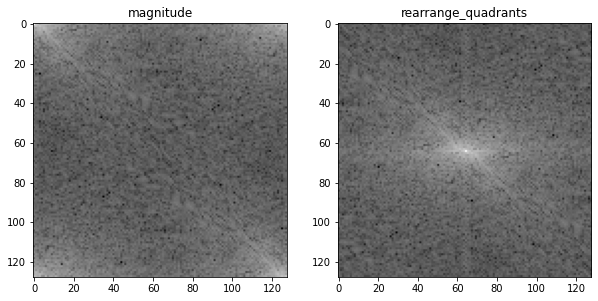

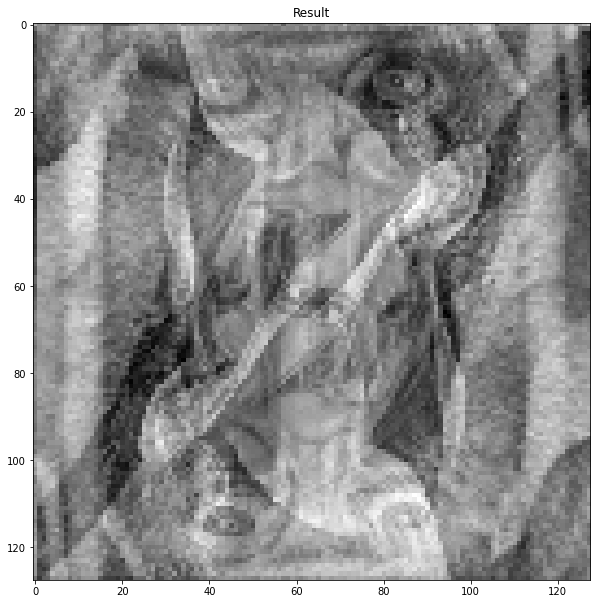

In [ ]:
im1 = cv2.imread(join(dbpath,r'phase_img_filter/baboon200.jpg'),0)
im2 = cv2.imread(join(dbpath,r'phase_img_filter/lena.jpg'),0)

im1 = cv2.resize(im1,(128,128))
im2 = cv2.resize(im2,(128,128))

m1,ph1 = fft(im1)
m2,ph2 = fft(im2)
r, c = im1.shape[:2]
i = np.zeros((r,c,2))
i[...,0] = m2
i[...,1] = ph1
real = cv2.idft(i, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
# cv2.normalize(real, real, 0, 255, cv2.cv.CV_MINMAX)
cv2.normalize(real, real, 0, 255, cv2.NORM_MINMAX)

imshow(("Result",real.astype('u1')), cmap='gray',figsize=(10.25,10.25))

In [ ]:
def generateRandomMotionImage(seed):
    img = np.zeros((2000, 2000), 'u1')
    x,y,w,h = (10, 10, 50, 50)
    seed = np.sin(seed) + seed ** 1.2 - .8 *seed
    x += seed ** .9
    y += seed ** 1.1
    w += seed * 1.1
    h += seed * .9
    x0, y0, x1, y1 = x, y, x + w, y + h
    img = put_rect(img, (int(x0), int(y0), int(x1), int(y1)))
    return img


def put_rect(img, bb, color=(255, 255, 255), thickness=2, scale=None, bias=(0, 0, 0, 0)):
    x0,y0,x1,y1 = bb
    cv2.rectangle(img, (x0, y0), (x1, y1), color, thickness)
    return img

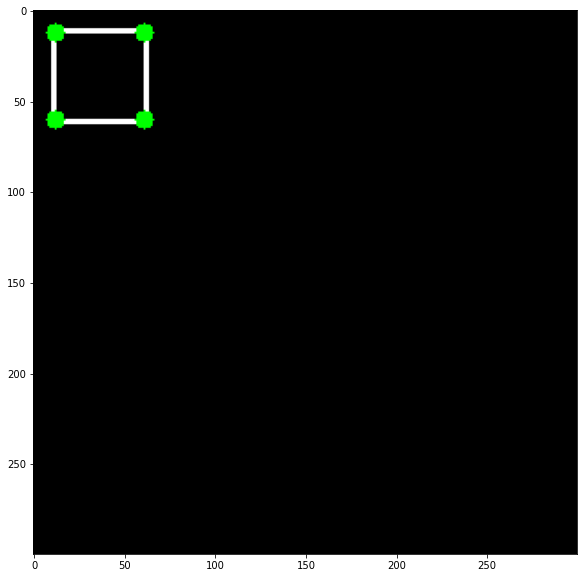

In [ ]:
# feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
# # Parameters for lucas kanade optical flow
# lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# # Create some random colors
# color = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [0, 255, 255], [255, 0, 255]])
# fno = 1
# old_gray = generateRandomMotionImage(fno)
# # Take first frame and find corners in it
# # dispImg = np.zeros((old_gray.shape[0], old_gray.shape[1], 3), 'u1')
# dispImg = cv2.cvtColor(old_gray, cv2.COLOR_GRAY2BGR)
# trackImg = dispImg.copy()
# p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
# for p in p0:
#     x, y = p[0]
#     cv2.circle(dispImg, (int(x), int(y)), 5, (0, 255, 0), -1)
# imshow(dispImg[:300,:300])

In [ ]:
# feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
# # Parameters for lucas kanade optical flow
# lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# # Create some random colors
# color = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [0, 255, 255], [255, 0, 255]])
# fno = 1
# old_gray = generateRandomMotionImage(fno)
# # Take first frame and find corners in it
# dispImg = np.zeros((old_gray.shape[0], old_gray.shape[1], 3), 'u1')
# trackImg = dispImg.copy()
# p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
# for p in p0:
#     x, y = p[0]
#     cv2.circle(dispImg, (int(x), int(y)), 5, (0, 255, 0), -1)
# # Create a mask image for drawing purposes
# while True:
#     fno += 1
#     crnt_gray = generateRandomMotionImage(fno)
#     # calculate optical flow
#     p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, crnt_gray, p0, None, **lk_params)
#     if p1 is None or fno > 375:
#         cv2.destroyAllWindows()
#         break
#     # Select good points
#     good_new = p1#[st==1]
#     good_old = p0#[st==1]
#     # draw the tracks
#     for i, (new, old) in enumerate(zip(good_new, good_old)):
#         a, b = new.ravel()
#         c, d = old.ravel()
#         trackImg = cv2.line(trackImg, (a, b), (c, d), color[i].tolist(), 1)
#         trackImg = cv2.circle(trackImg, (a, b), 2, color[i].tolist(), -1)
#     crnt_frame = cv2.cvtColor(crnt_gray, cv2.COLOR_GRAY2BGR)
#     dispImg = cv2.add(trackImg, crnt_frame)
#     cv2.namedWindow('dispImg', 0);
#     cv2.imshow('dispImg', dispImg)
#     k = cv2.waitKey(33) & 0xff
#     if k == 27:
#         cv2.destroyAllWindows()
#         break
#     # Now update the previous frame and previous points
#     old_gray = crnt_gray.copy()
#     p0 = good_new.reshape(-1, 1, 2)
